# Customer Churn Analysis

**Problem Statement:**
    
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
%matplotlib inline

In [2]:
df=pd.read_csv("Customer_Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see there are total 7043 rows and 21 columns in the dataset.Also, both categorical and numerical features are present.

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

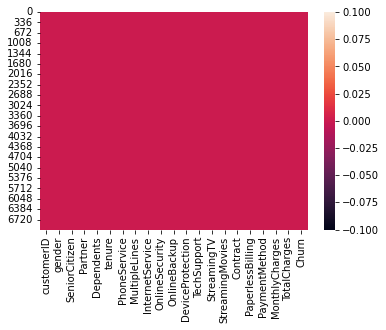

In [6]:
sns.heatmap(df.isnull())

We can see there is no null value in the dataset.

In [7]:
#checking duplicated data
df.duplicated().sum()

0

In [8]:
#dropping custimerid as it is not required for our analysis
df.drop('customerID',axis=1,inplace=True)

In [9]:
#checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('*'*50)

Male      3555
Female    3488
Name: gender, dtype: int64
**************************************************
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
**************************************************
No     3641
Yes    3402
Name: Partner, dtype: int64
**************************************************
No     4933
Yes    2110
Name: Dependents, dtype: int64
**************************************************
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
**************************************************
Yes    6361
No      682
Name: PhoneService, dtype: int64
**************************************************
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
**************************************************
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
**************

# Data cleaning

In [10]:
#We can see data is blank in 11 rows in Total charges,lets check
df.query("TotalCharges == ' '").TotalCharges.count()

11

In [11]:
#dropping the blank rows and converting this feature to float
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
df.dropna(inplace = True);
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [12]:
df.shape

(7032, 20)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [14]:
feature=["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
for col in feature:
    print("{} : {}".format(col,df[col].unique()))

OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']


In [15]:

for col in feature:
    df[col] = df[col].replace({'No internet service':'No'})

In [16]:
for col in feature:
    print("{} : {}".format(col,df[col].unique()))

OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']


# EDA:

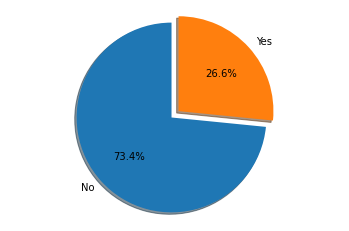

In [17]:
plt.pie(df["Churn"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90,labels=df["Churn"].unique())
plt.axis('equal') ;

We can see 26% customers has churn. Let's check the categorical features-

In [18]:
categorical=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

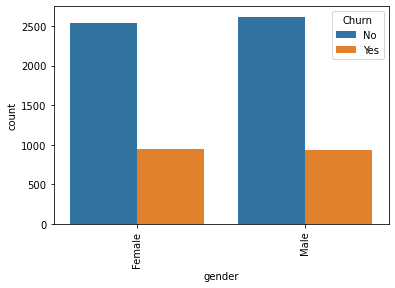

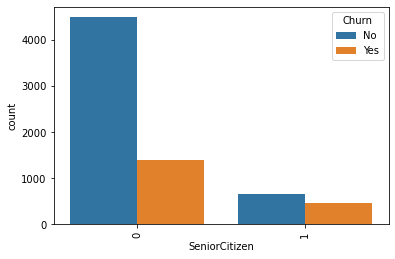

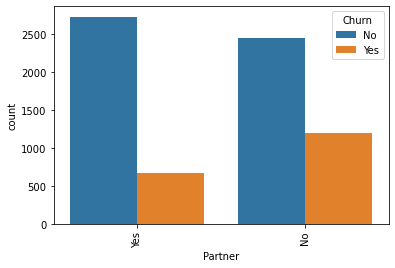

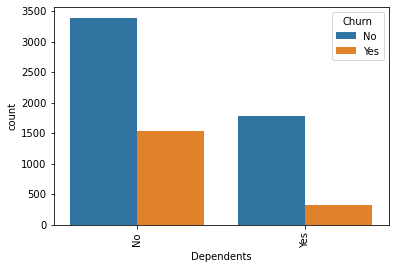

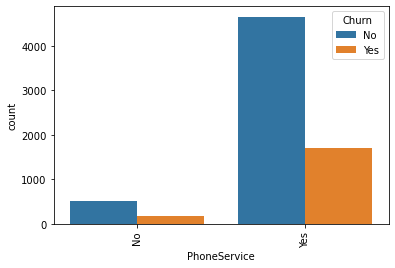

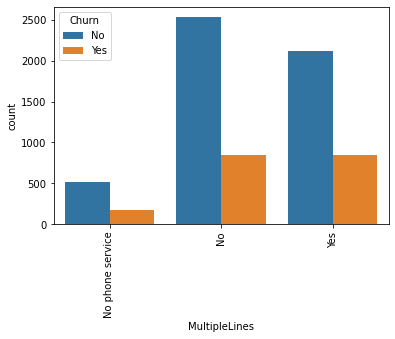

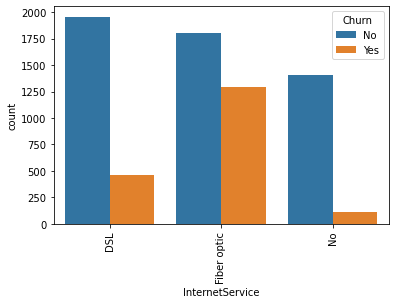

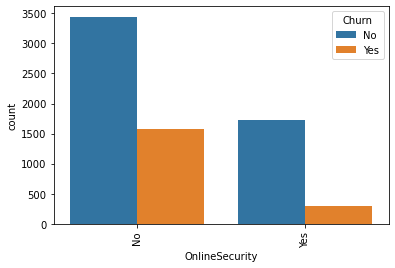

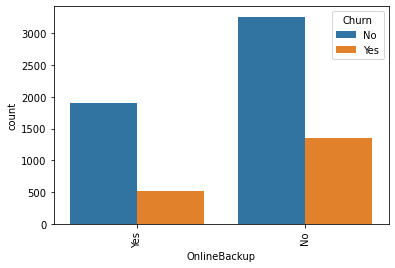

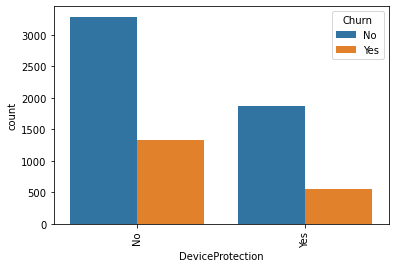

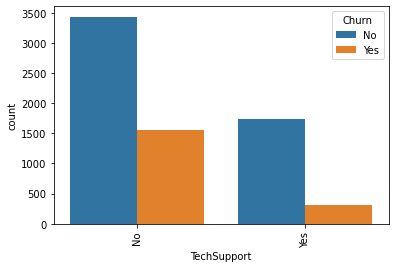

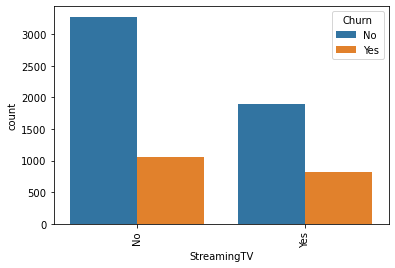

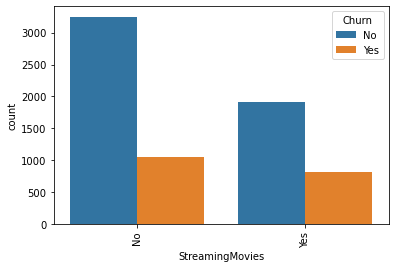

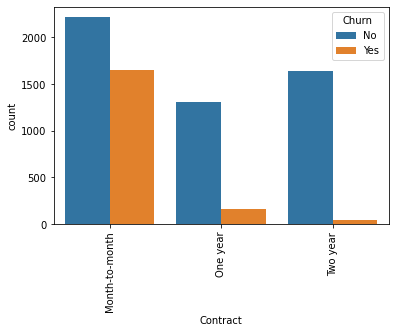

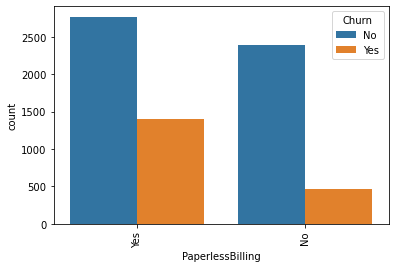

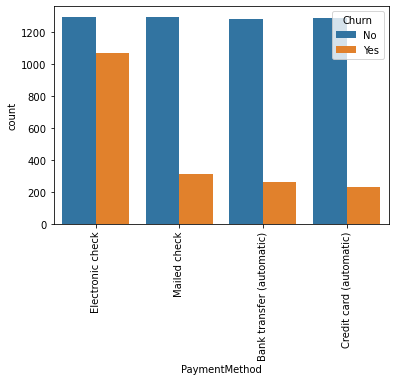

In [19]:
for i in categorical:
    sns.countplot(x=i,hue='Churn',data=df)
    plt.xticks(rotation=90)
    plt.show()

From above figures, we observe-

The customers having phone services are large in numbers and has more churn.

Churn is same for male and female.

Senior citizens have less churn.

The customers who do not have partners has more churn than others.

The customers who do not have dependents has more churn than others.

customer churn is more in Fiber optic followed by DSL.

customer churn is more if there is no online security,online backup,device protection,tech support.

The churn rate is nearly same if the customer own StreamingTV or not.

The existing customers do not own StreamingMovies in their devices. And the churn rate is low when the customer do not have internet services.

Churn is much higher for monthly contracts.

Customers prefer paperless billing have high churn rate.

Chhurn is high if the payment is Electronic check.

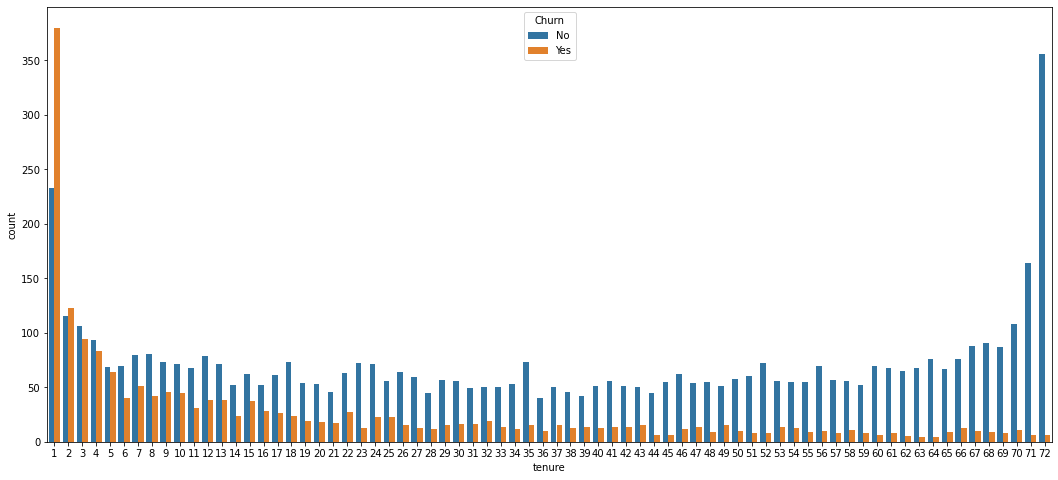

In [20]:
f, axes = plt.subplots(figsize=(18, 8))
sns.countplot(df["tenure"],hue = df["Churn"]);

We observe more churn when tenure is betwwen 0-4 years. it reduces over the years.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

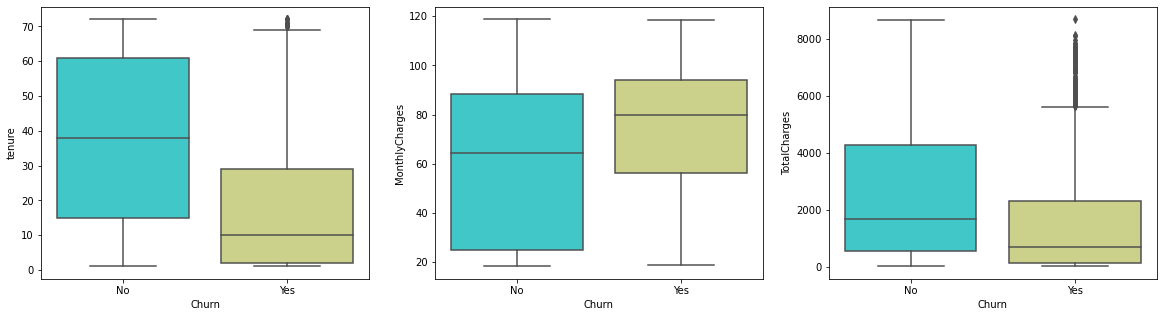

In [21]:
f, axes = plt.subplots( ncols=3, figsize=(20, 5))
sns.boxplot(x="Churn", y="tenure", data=df,palette='rainbow',ax = axes[0]);
sns.boxplot(x="Churn", y="MonthlyCharges", data=df,palette='rainbow',ax = axes[1])
sns.boxplot(x="Churn", y="TotalCharges", data=df,palette='rainbow',ax = axes[2])

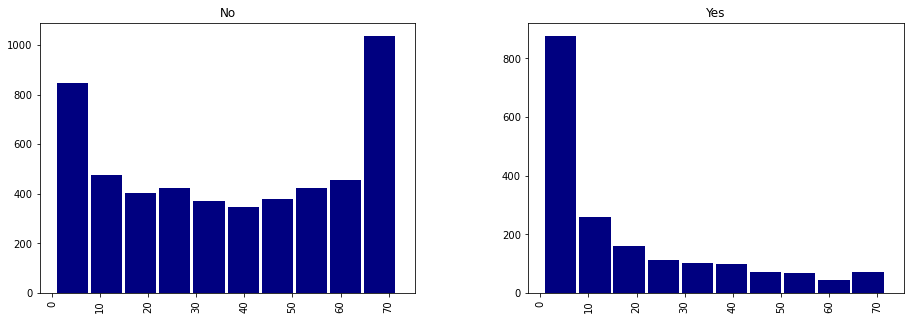

In [22]:
fig=df['tenure'].hist(by=df['Churn'],figsize=(15,5),width=6.5, color='navy' )
plt.show()

Churn is more when tenure is less.
Churn is more when monthly Charges is more.
Churn is more when total Charges is less than 2k.

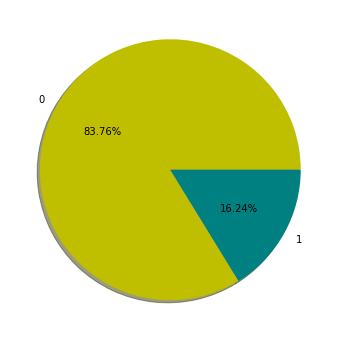

In [23]:
#Visualize the count SeniorCitizen
labels='0','1'
fig, ax = plt.subplots(figsize=(6,6))
colors=["y","teal"]
ax.pie(df['SeniorCitizen'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()

Around 83% of the customers are not senior citizens and only 16% are senior citizens.

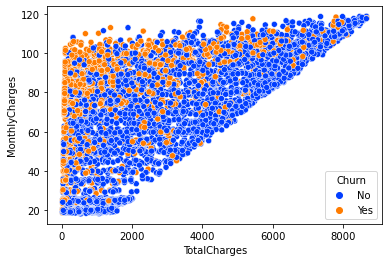

In [24]:
#Comparing TotalCharges and MonthlyCharges 
sns.scatterplot( x = "TotalCharges",y = "MonthlyCharges", data = df,hue="Churn",palette="bright")
plt.show()

Customers with high monthly charges have high tendancy to stop the services since they have high total charges.

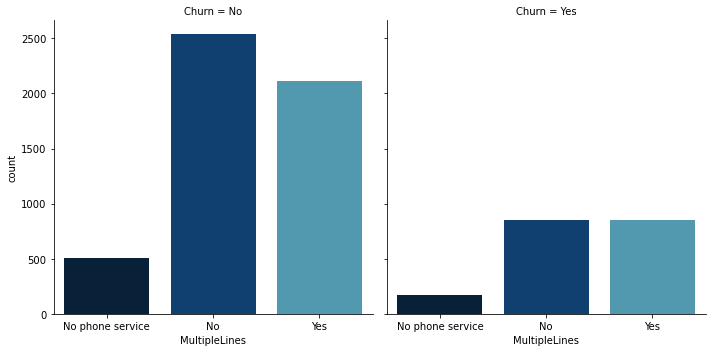

In [25]:
# Checking Churn level and MultipleLines
sns.catplot(x= 'MultipleLines',col='Churn',palette="ocean",kind="count",data=df)
plt.show()

The customers having phone services from single line have high churn rate compared to the customers having phone services from multiple lines, also there are very less number of customers who do not have phone services.

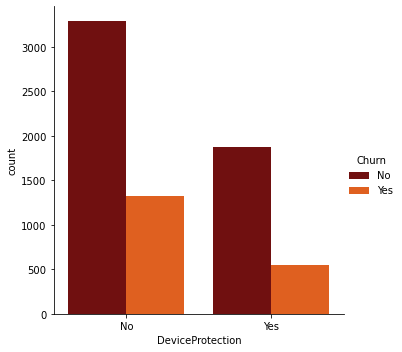

In [26]:
# Checking Churn level in DeviceProtecion
sns.catplot(x='DeviceProtection',hue='Churn',palette="gist_heat",kind="count",data=df)
plt.show()

The customers who do not own any Device protection have very high churn rate compared to others.

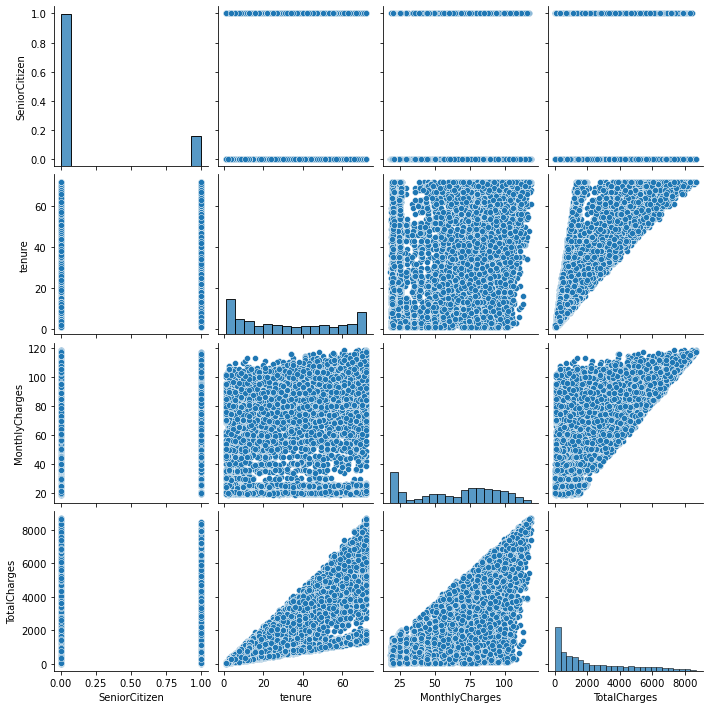

In [27]:
sns.pairplot(df)

# Outliers:


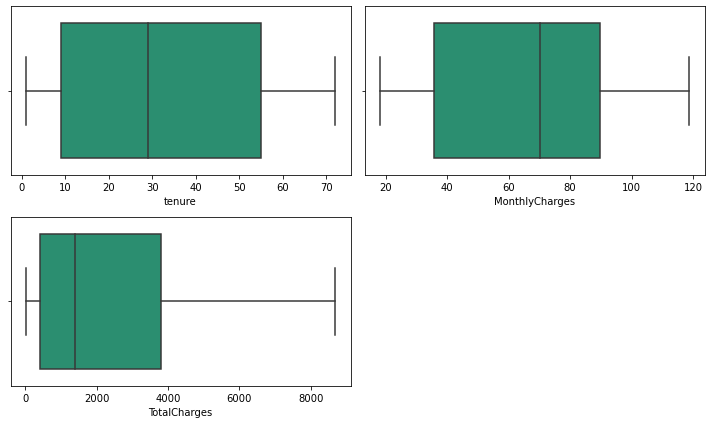

In [28]:
# Let's check the outliers by ploting box plot
numerical_col=['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],palette="Dark2")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

We dont see outliers in the dataset.

# Encoder

In [29]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


# Correlation

In [30]:
# Checking the correlation between features and the target
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.131228,0.226824,0.231898,0.134212,0.275113,0.280330,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.392174,-0.313708,-0.305757,-0.388535,-0.241330,-0.250144,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.131228,-0.392174,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,0.245660,-0.004051,-0.149112,0.296447,0.412619,-0.171270
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.226824,-0.313708,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.155262,0.127056,-0.170720,0.441529,0.510100,-0.082307


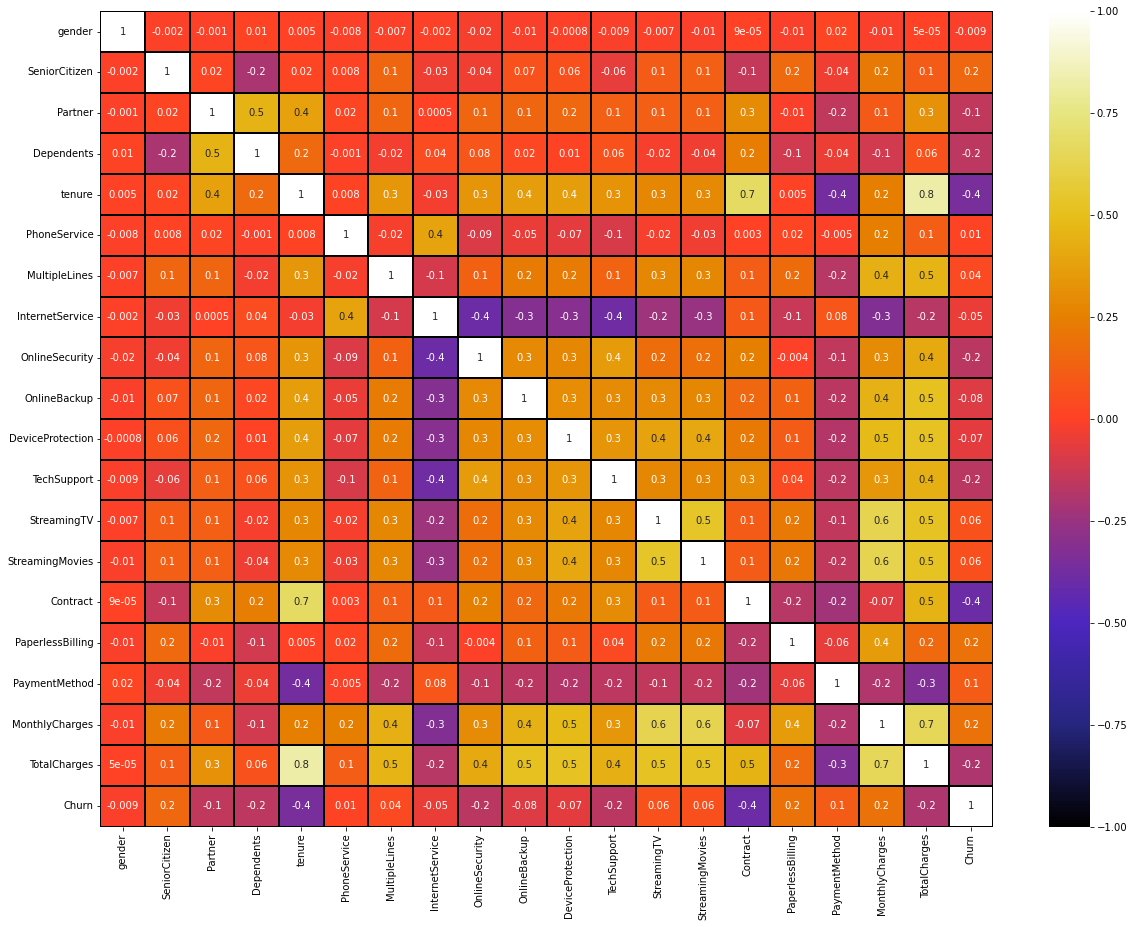

In [31]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="CMRmap")
plt.yticks(rotation=0);

The columns MonthlyCharges, PaperlessBilling, SeniorCitizen and PaymentMethod have positive collrelation with the label Churn.

It is negatively correlated with Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner and Dependents.

Also the column gender has very less correlation with the label.

The columns TotalCharges and tenure, Contract and tenure, TotalCharges and MonthlyCharges and many other columns have high correlation with each other. This leads to multicolllinearity issue, to overcome with this problem we will check VIF values and then we will drop the columns having VIF above 10.

In [32]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
StreamingTV         0.063254
StreamingMovies     0.060860
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
InternetService    -0.047097
DeviceProtection   -0.066193
OnlineBackup       -0.082307
Partner            -0.149982
Dependents         -0.163128
TechSupport        -0.164716
OnlineSecurity     -0.171270
TotalCharges       -0.199484
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

# Skewness

In [33]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [34]:
# Checking the skewness
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.944373
OnlineBackup        0.652954
DeviceProtection    0.657594
TechSupport         0.925245
StreamingTV         0.475441
StreamingMovies     0.458191
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

We can see skewness in the data.

In [35]:
# Splitting the dataset into feature and vector:

x = df.drop(['Churn'], axis =1)
y = df['Churn']
df2=pd.DataFrame(x,columns=x.columns)

In [36]:
from sklearn.preprocessing import power_transform

x = power_transform(x)
x

array([[-1.00943013, -0.44032709,  1.03561683, ...,  0.4110058 ,
        -1.15999612, -1.81006854],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  1.32047796,
        -0.24134546,  0.25425652],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  1.32047796,
        -0.34453193, -1.38609098],
       ...,
       [-1.00943013, -0.44032709,  1.03561683, ...,  0.4110058 ,
        -1.16868516, -0.85839282],
       [ 0.99065797,  2.27103902,  1.03561683, ...,  1.32047796,
         0.33273687, -0.92147688],
       [ 0.99065797, -0.44032709, -0.9656081 , ..., -1.48978043,
         1.33845304,  1.48336977]])

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(x)
x

array([[-1.00943013, -0.44032709,  1.03561683, ...,  0.4110058 ,
        -1.15999612, -1.81006854],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  1.32047796,
        -0.24134546,  0.25425652],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  1.32047796,
        -0.34453193, -1.38609098],
       ...,
       [-1.00943013, -0.44032709,  1.03561683, ...,  0.4110058 ,
        -1.16868516, -0.85839282],
       [ 0.99065797,  2.27103902,  1.03561683, ...,  1.32047796,
         0.33273687, -0.92147688],
       [ 0.99065797, -0.44032709, -0.9656081 , ..., -1.48978043,
         1.33845304,  1.48336977]])

In [38]:
pd.DataFrame(x).skew()

0    -0.018776
1     1.831103
2     0.070024
3     0.880908
4    -0.242816
5    -2.729727
6     0.033718
7    -0.072388
8     0.944373
9     0.652954
10    0.657594
11    0.925245
12    0.475441
13    0.458191
14    0.304841
15   -0.377503
16   -0.207192
17   -0.259485
18   -0.144643
dtype: float64

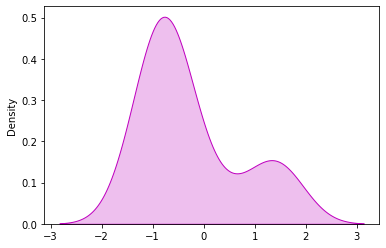

In [39]:
# Let's visualize how the data has been distributed in TotalCharges after removing skewness
sns.distplot(x[18],color="m",kde_kws={"shade": True},hist=False)
plt.show()

# Variance Inflation Factor(VIF)

In [40]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(pd.DataFrame(x).values,i) for i in range(pd.DataFrame(x).shape[1])]
    vif["features"]=df2.columns
    print(vif)
    
vif_calc()    

    VIF Factor          features
0     1.001505            gender
1     1.149981     SeniorCitizen
2     1.458789           Partner
3     1.377449        Dependents
4    42.559139            tenure
5     1.798958      PhoneService
6     1.433557     MultipleLines
7     1.872542   InternetService
8     1.482110    OnlineSecurity
9     1.472535      OnlineBackup
10    1.577727  DeviceProtection
11    1.528762       TechSupport
12    1.918852       StreamingTV
13    1.924642   StreamingMovies
14    2.477045          Contract
15    1.203148  PaperlessBilling
16    1.181692     PaymentMethod
17   13.430757    MonthlyCharges
18   59.463106      TotalCharges


Here we can find the feature TotalCharges,MonthlyCharges and tenure have VIF value greater than 10 which means they have high correlation with the other features.

In [43]:
# Dropping TotalCharges column
df2.drop("TotalCharges",axis=1,inplace=True)

In [45]:
x=df2
x = power_transform(x)
x = scaler.fit_transform(x)

In [46]:
vif_calc()

    VIF Factor          features
0     1.001499            gender
1     1.149913     SeniorCitizen
2     1.458786           Partner
3     1.377313        Dependents
4     2.607272            tenure
5     1.795376      PhoneService
6     1.431307     MultipleLines
7     1.782885   InternetService
8     1.472220    OnlineSecurity
9     1.465245      OnlineBackup
10    1.568143  DeviceProtection
11    1.517501       TechSupport
12    1.918342       StreamingTV
13    1.923134   StreamingMovies
14    2.346898          Contract
15    1.202478  PaperlessBilling
16    1.179186     PaymentMethod
17    4.919312    MonthlyCharges


As the VIF values are less than 10, there is no multicolinearity.

In [47]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

Here we can observe the data is not balanced, since it is classification problem we will balance the data using oversampling method.

# Oversampling


In [48]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [49]:
# Checking value count of target column
y.value_counts()

0.0    5163
1.0    5163
Name: Churn, dtype: int64

Dataset is balanced now,we can proceed with the model.

# Finding Best Random State

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred = RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8653970303421562  on Random_state  6


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

lg=LogisticRegression()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

model=[lg,sv,rf,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score: of',m)
    acc=accuracy_score(y_test,pred)
    print(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between Accuracy Score and CrossValidation Score:",abs(acc-crossval))
    print("\n")

Accuracy score: of LogisticRegression()
0.789541639767592
[[1175  374]
 [ 278 1271]]
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78      1549
         1.0       0.77      0.82      0.80      1549

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098

Cross Validation Score: 0.7776494799931557
Difference Between Accuracy Score and CrossValidation Score: 0.01189215977443625


Accuracy score: of SVC()
0.816333118140736
[[1223  326]
 [ 243 1306]]
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81      1549
         1.0       0.80      0.84      0.82      1549

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098

Cross Validation Score: 0.8067034355376685
Difference Between Acc

We can see Random Forest Classifier is performing better than other models.

# Hyper Parameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

parameters = {'max_depth': np.arange(8,20), 
              'max_features': ['sqrt','auto', 'log2'], 
              'n_estimators': [92,95,97,98,100,102,105,107,109],
              'criterion' :['gini','entropy','log_loss'] }

grid_rf = GridSearchCV(rf, param_grid = parameters, cv = 5)
grid_rf.fit(x,y)

best_params = grid_rf.best_params_
best_score = grid_rf.best_score_

print(best_params)
print(best_score)

{'criterion': 'gini', 'max_depth': 17, 'max_features': 'sqrt', 'n_estimators': 107}
0.8549369123992978


In [55]:
rf1=RandomForestClassifier(max_features ='sqrt', max_depth= 17,criterion= 'gini',n_estimators=107)
rf1.fit(x_train,y_train)
predrf1=rf1.predict(x_test)
print('Accuracy score: of',rf1)
acc=accuracy_score(y_test,predrf1)
print(acc)
print(confusion_matrix(y_test,predrf1))
print(classification_report(y_test,predrf1))

Accuracy score: of RandomForestClassifier(max_depth=17, n_estimators=107)
0.8621691413815364
[[1301  248]
 [ 179 1370]]
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1549
         1.0       0.85      0.88      0.87      1549

    accuracy                           0.86      3098
   macro avg       0.86      0.86      0.86      3098
weighted avg       0.86      0.86      0.86      3098



# ROC AUC

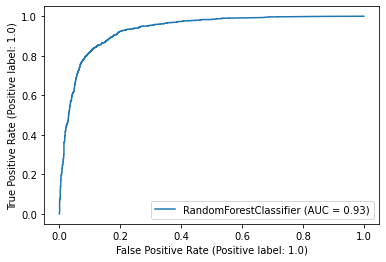

In [56]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(rf1,x_test,y_test)
#plot_roc_curve(rf1, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix

plt.show()

The score is good, we can save the model.

# Saving The Model

In [57]:
# Saving the model using .pkl
import pickle
filename='Churn.pkl'
pickle.dump(rf1,open(filename,'wb'))

# Conclusion

In [58]:
import numpy as np
a=np.array(y_test)
df_com=pd.DataFrame({"original":a,"Predicted":predrf1},index=range(len(a)))
df_com.sample(5)

,original,Predicted
1507,0.0,0.0
2052,1.0,1.0
2415,1.0,1.0
2987,0.0,0.0
1116,1.0,0.0
